# Data Scientist Challenge - LATAM Airlines

##Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de
Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que
aterrizó o despegó de SCL.

In [ ]:
## librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [ ]:
# Data
dataset_SCL = pd.read_csv('dataset_SCL.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dataset_SCL.shape

(68206, 18)

La tabla con datos tiene 68206 datos y 18 columnas

In [ ]:
# Columnas
dataset_SCL.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')

In [ ]:
# Vista preeliminar de los datos
dataset_SCL.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


## Distribución de datos

In [ ]:
dataset_SCL.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


Los descripción de los datos sugieren que tenemos cantidades similares de vuelos a lo largo del año.

Se observa que hay dos años en los datos, 2017 y 2018

In [ ]:
dataset_SCL.AÑO.value_counts()

2017    68204
2018        2
Name: AÑO, dtype: int64

Llama la antención que solo sean 2 datos del 2018.

Obersavamos los datos del 2018.

In [ ]:
dataset_SCL.iloc[dataset_SCL.AÑO[dataset_SCL.AÑO>2017].index.values,:]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


Los datos del 2018 corresponde a atrasos del último día del 2017, por lo que su atraso los lleva a ser clasificados como 2018

### Tipos de Vuelo
Analizamos la tasa de vuelos según el tipo de vuelo

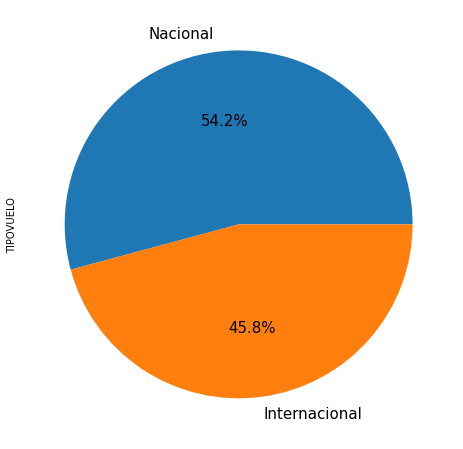

In [ ]:
plt.figure(figsize=(8,8))
dataset_SCL['TIPOVUELO'].value_counts().plot.pie(labels=['Nacional','Internacional'],autopct='%.1f%%',textprops ={"fontsize":15})
plt.show()

Observamos que tenemos un mayor pocentaje de vuelos nacionales, con una diferencia de 8.4%.

### Distrubucion de vuelos a lo largo del año

Analizamos la cantidad de vuelos a lo largo del año mediante el siguiente heatmap

In [ ]:
df1 = dataset_SCL.groupby(['MES', 'DIA'],sort=False).agg(['size'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
df1 = df1.iloc[:,:3]
df1.head()

,MES,DIA,size
0,1,1,170
1,1,2,199
2,1,3,192
3,1,4,194
4,1,5,198


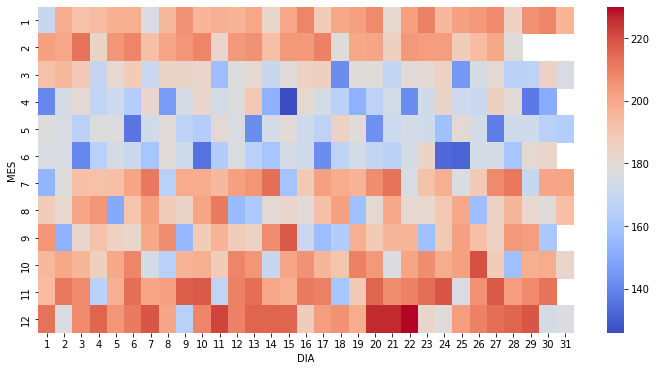

In [ ]:

heatmap_data = pd.pivot_table(df1, values='size', index=['MES'], columns='DIA')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data,cmap="coolwarm")
plt.show()

Según la cantidad de vuelos podemos observar que entre los meses 3 y 6 la cantidad de vuelos es menor comparada con el resto.

Además se observa un patrón a lo largo de los día, lo que sugiere que existe diferencia en la cantidad de vuelos en la semana.

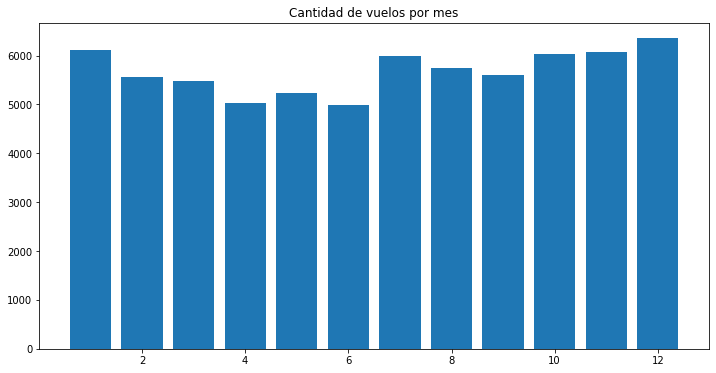

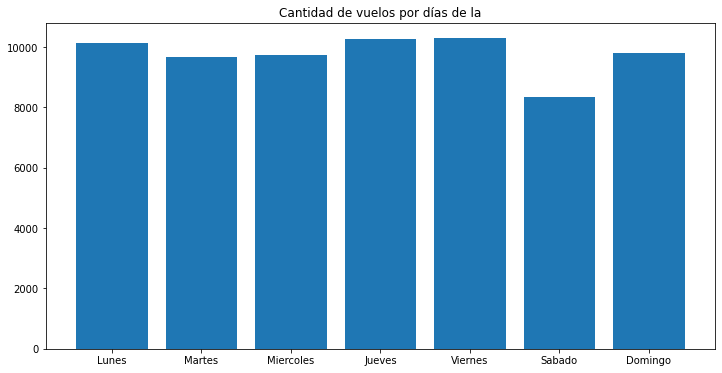

In [ ]:
# Cantidad de vuelos por mes

plt.figure(figsize=(12,6))
dias_freq = dataset_SCL.MES.value_counts()
plt.bar(dias_freq.index,dias_freq)
plt.title('Cantidad de vuelos por mes')
plt.show()

plt.figure(figsize=(12,6))
dias_freq = dataset_SCL.DIANOM.value_counts()
dias_freq = dias_freq[['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']]
plt.title('Cantidad de vuelos por días de la')
plt.bar(dias_freq.index,dias_freq)
plt.show()

Podemos reafirmar lo observado en el heatmap anterior. Los meses 3,4,5 y 6 son los meses que presentan menor cantidad de vuelos. Por otro lado dentro de la semana el sábado es el dia que se observan menos cantidad de vuelos.

### Distribución de aerolíneas

Analizamos la cantidad de vuelos por aerolínea que opera.

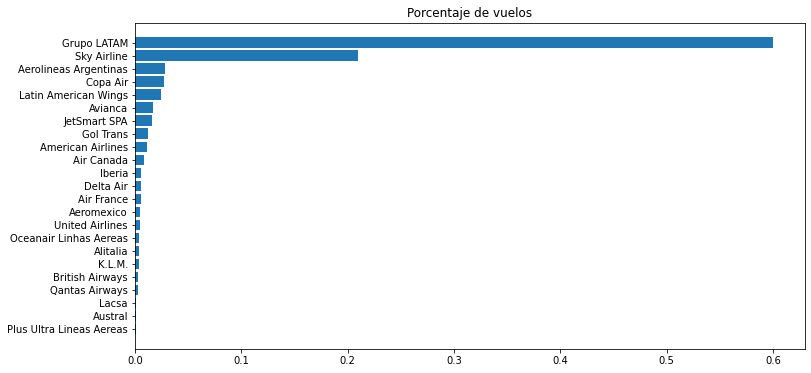

In [ ]:
plt.figure(figsize=(12,6))
dias_freq = dataset_SCL.OPERA.value_counts().sort_values(ascending=True)
plt.barh(dias_freq.index,dias_freq/dias_freq.sum())
plt.title('Porcentaje de vuelos')
plt.show()

Podemos observar que el Grupo LATAM es la aerolínea que presenta la mayor cantidad de vuelos, siendo el 60% de los vuelos. La segunda aerolínea es Sky Airline, con un 20% de los vuelos. Siendo estas las aerolíneas más importantes 

### Distribución de vuelos por destino

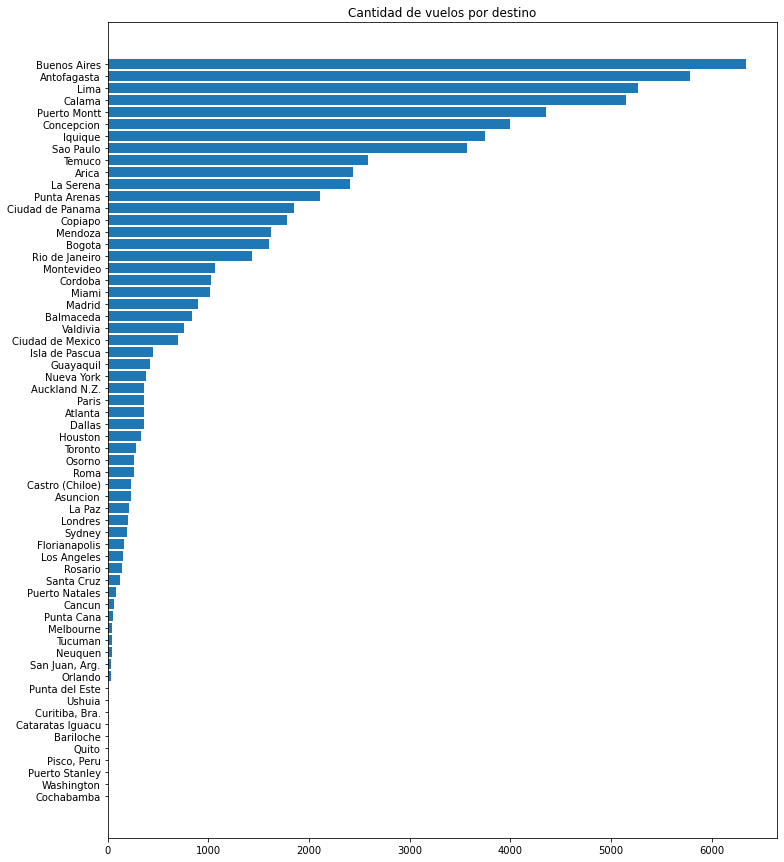

In [ ]:
plt.figure(figsize=(12,15))
dias_freq = dataset_SCL.SIGLADES.value_counts().sort_values()
plt.barh(dias_freq.index,dias_freq)
plt.title('Cantidad de vuelos por destino')
plt.show()


In [ ]:
print('Top 5 de los destinos')
print(dias_freq.sort_values(ascending=False).head(5))

Top 5 de los destinos
Buenos Aires    6335
Antofagasta     5786
Lima            5270
Calama          5146
Puerto Montt    4357
Name: SIGLADES, dtype: int64


Buenos Aires es el destino con mayor frecuencia

### Diferencia entre programado y operación

Determinamos la tasa de modificación entre lo programado y la operación de las siguientes parametros:

* Cod_vuelo: código de vuelo.
* Destino: destino.
* Cod_aerolinea: código de aerolínea.

In [ ]:
dataset_SCL['Vlo-O'] = dataset_SCL['Vlo-O'].astype(str).str.replace(r'\.0$', r"")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
dataset_SCL['Vlo-I'].astype(str)

0        226
1        226
2        226
3        226
4        226
        ... 
68201    400
68202    400
68203    400
68204    400
68205    400
Name: Vlo-I, Length: 68206, dtype: object

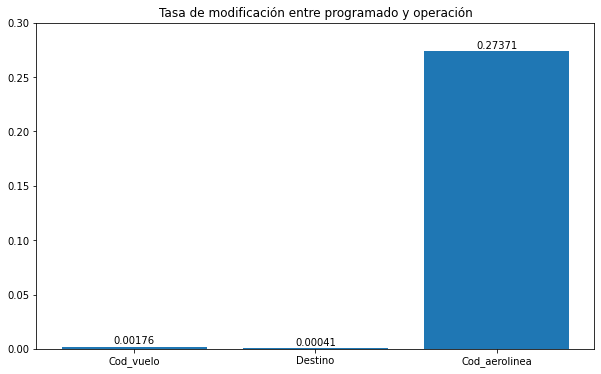

In [ ]:
diferencia_codVuelo = dataset_SCL['Vlo-I'].astype(str)==dataset_SCL['Vlo-O'].astype(str)
diferencia_destino = dataset_SCL['Des-I']==dataset_SCL['Des-O']
diferencia_aerolinea = dataset_SCL['Emp-I']==dataset_SCL['Emp-O']

dif_prog_op = pd.concat([diferencia_codVuelo.value_counts(),diferencia_destino.value_counts(),diferencia_aerolinea.value_counts()], axis=1)
dif_prog_op.columns=['Cod_vuelo','Destino','Cod_aerolinea']

def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1,y_list[i-1]+0.003,y_list[i-1], ha="center")

plt.figure(figsize=(10,6))
plt.bar(dif_prog_op.columns,dif_prog_op.iloc[1,:]/dif_prog_op.sum())
add_value_label(dif_prog_op.columns,round(dif_prog_op.iloc[1,:]/dif_prog_op.sum(),5))
plt.title('Tasa de modificación entre programado y operación')
plt.ylim([0,0.3])
plt.show()

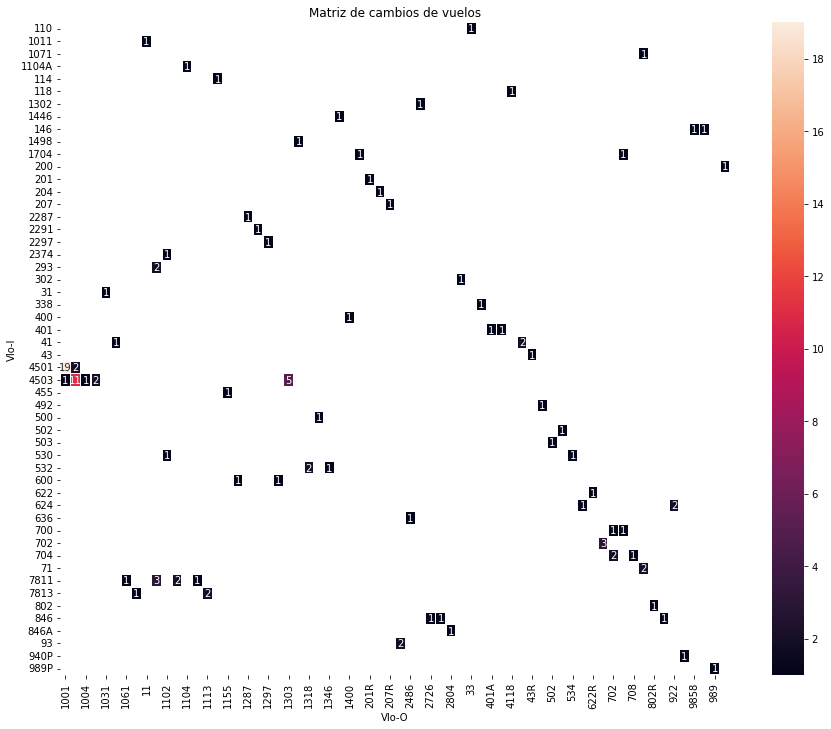

In [ ]:
diff_vuelos=dataset_SCL[diferencia_codVuelo==False]

df1 = diff_vuelos.groupby(['Vlo-I', 'Vlo-O'],sort=False).agg(['size'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
df1 = df1.iloc[:,:3]
df1.head()
heatmap_data = pd.pivot_table(df1, values='size', index=['Vlo-I'], columns='Vlo-O')

plt.figure(figsize=(15,12))
sns.heatmap(heatmap_data,annot=True,linewidths=.5)
plt.title('Matriz de cambios de vuelos')
plt.show()


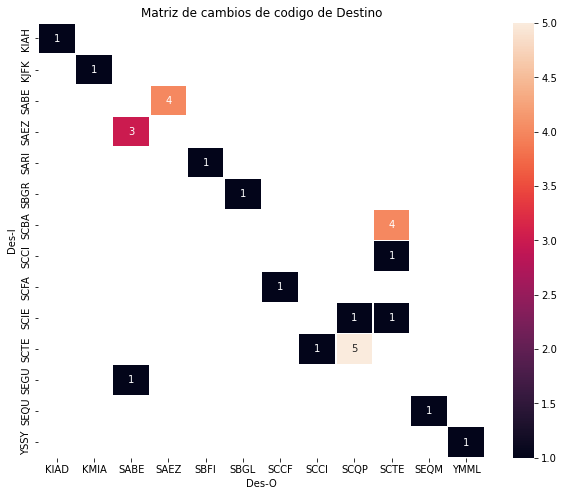

In [ ]:
diff_vuelos=dataset_SCL[diferencia_destino==False]

df1 = diff_vuelos.groupby(['Des-I', 'Des-O'],sort=False).agg(['size'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
df1 = df1.iloc[:,:3]
df1.head()
heatmap_data = pd.pivot_table(df1, values='size', index=['Des-I'], columns='Des-O')

plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data,annot=True,linewidths=.5)
plt.title('Matriz de cambios de codigo de Destino')
plt.show()


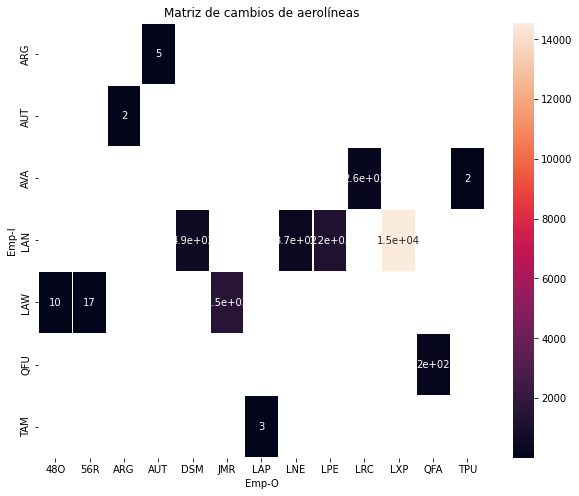

In [ ]:
diff_vuelos=dataset_SCL[diferencia_aerolinea==False]

df1 = diff_vuelos.groupby(['Emp-I', 'Emp-O'],sort=False).agg(['size'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
df1 = df1.iloc[:,:3]
df1.head()
heatmap_data = pd.pivot_table(df1, values='size', index=['Emp-I'], columns='Emp-O')

plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data,annot=True,linewidths=.5)
plt.title('Matriz de cambios de aerolíneas')
plt.show()

## Creación de columnas adicionales para synthetic_features.csv

* temporada_alta : 1 si Fecha-I est  entre 15-Dic y 3-Mar, 15-Jul y 31-Jul,11-Sep y 30-Sep, 0 si no.
* dif_min : diferencia en minutos entre Fecha-O y Fecha-I.
* atraso_15 : 1 si dif_min > 15, 0 si no.
* periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

In [ ]:
# Los datos de fecha de programación y de operación se llevan a formato fecha.

programado = pd.to_datetime(dataset_SCL['Fecha-I'], format='%Y-%m-%d %H:%M:%S')
operacion = pd.to_datetime(dataset_SCL['Fecha-O'], format='%Y-%m-%d %H:%M:%S')

synthetic_features = pd.concat([programado,operacion],axis=1)
synthetic_features

,Fecha-I,Fecha-O
0,2017-01-01 23:30:00,2017-01-01 23:33:00
1,2017-01-02 23:30:00,2017-01-02 23:39:00
2,2017-01-03 23:30:00,2017-01-03 23:39:00
3,2017-01-04 23:30:00,2017-01-04 23:33:00
4,2017-01-05 23:30:00,2017-01-05 23:28:00
...,...,...
68201,2017-12-22 14:55:00,2017-12-22 15:41:00
68202,2017-12-25 14:55:00,2017-12-25 15:11:00
68203,2017-12-27 14:55:00,2017-12-27 15:35:00
68204,2017-12-29 14:55:00,2017-12-29 15:08:00


* Generamos la columna temporada_alta

In [ ]:
pos_tempAlta = np.where((programado >= '2017-12-15' ) | (programado < '2017-03-04'))[0]
pos_tempAlta = np.append(pos_tempAlta,np.where((programado >= '2017-07-15' ) & (programado < '2017-08-01'))[0]) 
pos_tempAlta = np.append(pos_tempAlta,np.where((programado >= '2017-09-15' ) & (programado < '2017-10-01'))[0])
len(pos_tempAlta)

synthetic_features['temporada_alta']=0
synthetic_features['temporada_alta'][pos_tempAlta]=1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


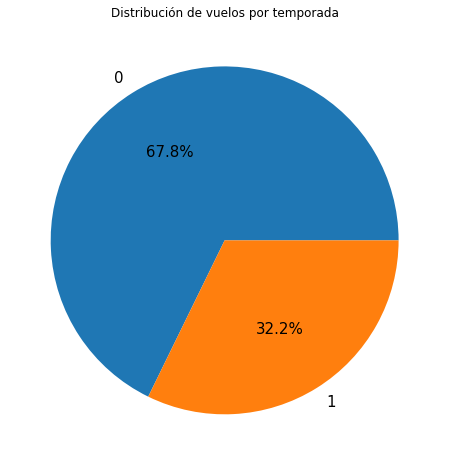

In [ ]:
# Distribución de temporada
plt.figure(figsize=(8,8))
plt.pie(synthetic_features.temporada_alta.value_counts(),labels=synthetic_features.temporada_alta.value_counts().index,autopct='%.1f%%',textprops ={"fontsize":15})
plt.title('Distribución de vuelos por temporada')
plt.show()


El 32.2% de los vuelos son realizados en temporada alta

* Generamos la diferencia en minutos entre Fecha-O y Fecha-I

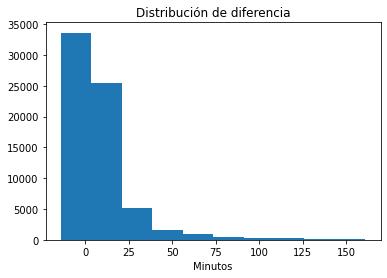

In [ ]:

dif_min =  operacion - programado
synthetic_features['dif_min'] = divmod(dif_min.dt.total_seconds(), 60)[0]
plt.hist(synthetic_features.dif_min)
plt.title('Distribución de diferencia')
plt.xlabel('Minutos')
plt.show()

* Generamos la columna de atraso de más de 15 minutos

In [ ]:
pos_atraso = np.where(synthetic_features.dif_min > 15)[0]

synthetic_features['atraso_15']=0
synthetic_features['atraso_15'][pos_atraso]=1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


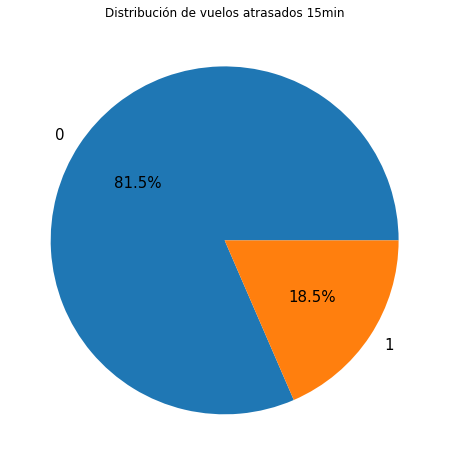

In [ ]:
# Distribución de temporada
plt.figure(figsize=(8,8))
plt.pie(synthetic_features.atraso_15.value_counts(),labels=synthetic_features.atraso_15.value_counts().index,autopct='%.1f%%',textprops ={"fontsize":15})
plt.title('Distribución de vuelos atrasados 15min')
plt.show()

18.5% de los vuelos se atrasa más de 15 minutos

* Generamos la columna que nos indica el periodo del día


In [ ]:
time = programado.dt.strftime("%H:%M")
pos_mañana = np.where((time >= '05:00' ) & (time < '12:00'))[0]
pos_tarde = np.where((time >= '12:00' ) & (time < '19:00'))[0]
pos_noche = np.where((time >= '19:00' ) | (time < '05:00'))[0]

synthetic_features['periodo_dia']='periodo'

synthetic_features['periodo_dia'][pos_mañana]='mañana'
synthetic_features['periodo_dia'][pos_tarde]='tarde'
synthetic_features['periodo_dia'][pos_noche]='noche'

synthetic_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Fecha-I,Fecha-O,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,2017-01-01 23:33:00,1,3.0,0,noche
1,2017-01-02 23:30:00,2017-01-02 23:39:00,1,9.0,0,noche
2,2017-01-03 23:30:00,2017-01-03 23:39:00,1,9.0,0,noche
3,2017-01-04 23:30:00,2017-01-04 23:33:00,1,3.0,0,noche
4,2017-01-05 23:30:00,2017-01-05 23:28:00,1,-3.0,0,noche
...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,2017-12-22 15:41:00,1,46.0,1,tarde
68202,2017-12-25 14:55:00,2017-12-25 15:11:00,1,16.0,1,tarde
68203,2017-12-27 14:55:00,2017-12-27 15:35:00,1,40.0,1,tarde
68204,2017-12-29 14:55:00,2017-12-29 15:08:00,1,13.0,0,tarde


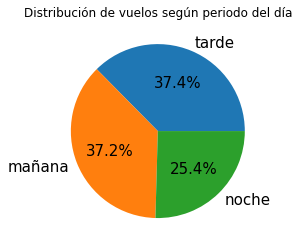

In [ ]:
plt.pie(synthetic_features.periodo_dia.value_counts(),labels=synthetic_features.periodo_dia.value_counts().index,autopct='%.1f%%',textprops ={"fontsize":15})
plt.title('Distribución de vuelos según periodo del día')
plt.show()


In [ ]:
synthetic_features.describe()

,temporada_alta,dif_min,atraso_15
count,68206.000000,68206.000000,68206.000000
mean,0.322376,8.960663,0.184940
std,0.467390,19.405596,0.388252
min,0.000000,-14.000000,0.000000
25%,0.000000,-2.000000,0.000000
50%,0.000000,4.000000,0.000000
75%,1.000000,12.000000,0.000000
max,1.000000,161.000000,1.000000


In [ ]:
synthetic_features.to_csv('synthetic_features.csv')

## Tasa de atraso

### Tasa de atraso según destino

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


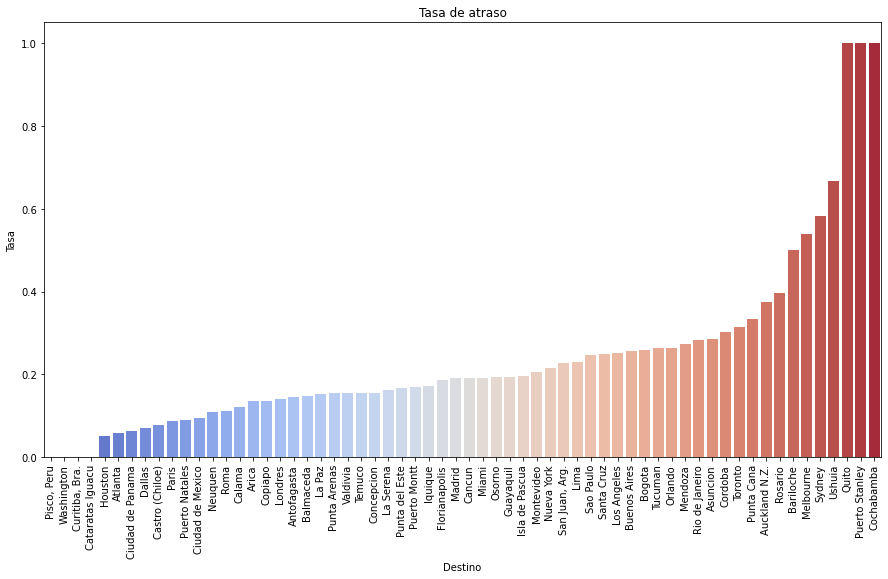

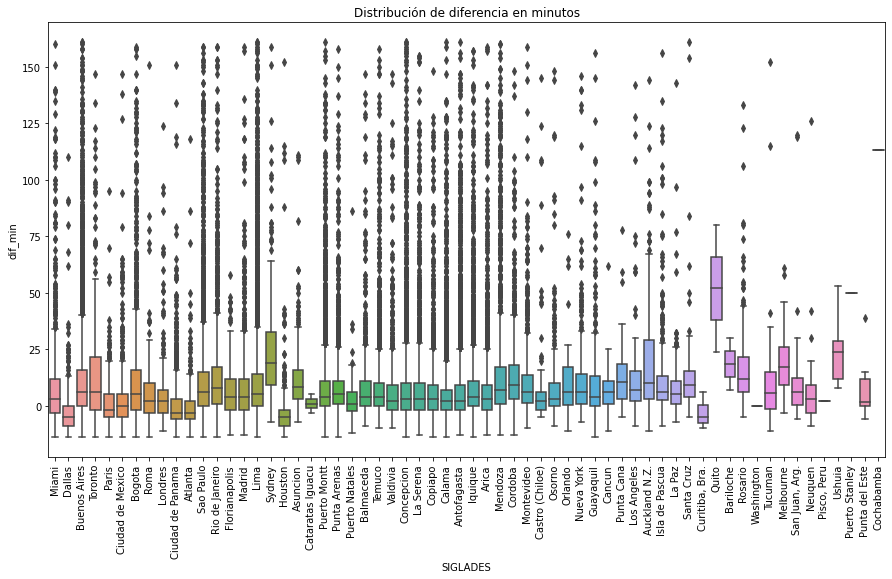

In [ ]:
from seaborn import palettes
destino = dataset_SCL['SIGLADES'].unique()

tasa_atraso=list()
for elem in destino:
  tasa = synthetic_features.atraso_15[dataset_SCL['SIGLADES']==elem].sum()/len(synthetic_features.atraso_15[dataset_SCL['SIGLADES']==elem])
  tasa_atraso.append(tasa)



tasa_destino = pd.concat([pd.DataFrame(destino),pd.DataFrame(tasa_atraso)],axis=1)
tasa_destino.columns = ['Destino','Tasa']
tasa_destino = tasa_destino.sort_values('Tasa')

plt.figure(figsize=(15,8))
sns.barplot(tasa_destino.Destino,tasa_destino.Tasa,palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Tasa de atraso')
plt.show()

atraso_dest = pd.concat([dataset_SCL['SIGLADES'],synthetic_features['dif_min']],axis=1)
plt.figure(figsize=(15,8))
sns.boxplot(x="SIGLADES",y="dif_min", data=atraso_dest)
plt.title('Distribución de diferencia en minutos')
plt.xticks(rotation=90)
plt.show()

### Tasa de atraso según aerolinea programada

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


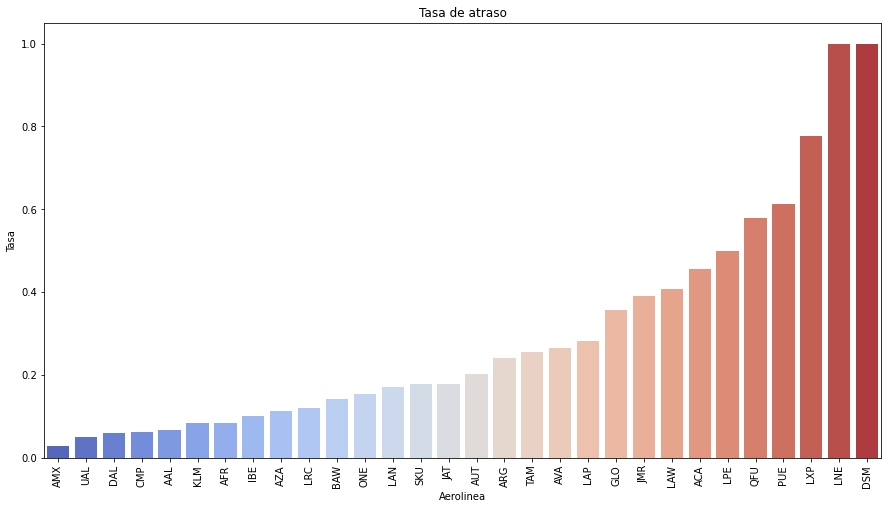

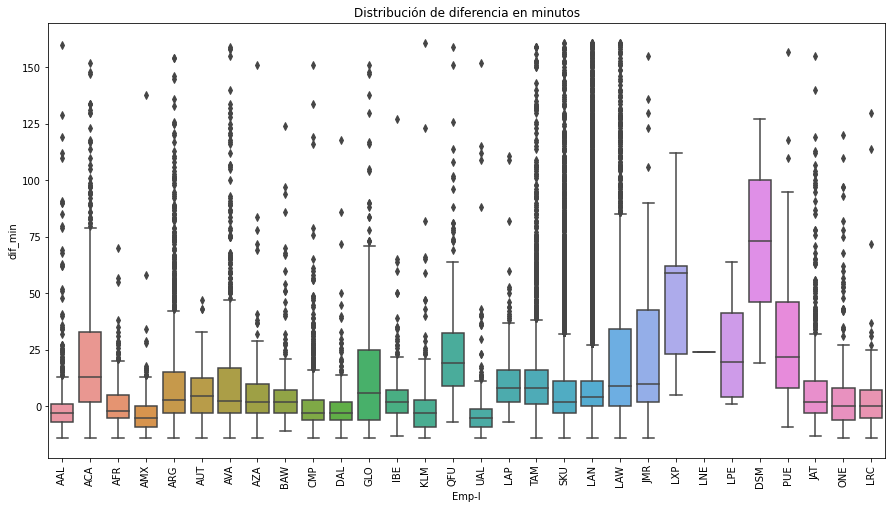

In [ ]:
destino = dataset_SCL['Emp-I'].unique()

tasa_atraso=list()
for elem in destino:
  tasa = synthetic_features.atraso_15[dataset_SCL['Emp-I']==elem].sum()/len(synthetic_features.atraso_15[dataset_SCL['Emp-I']==elem])
  tasa_atraso.append(tasa)



tasa_destino = pd.concat([pd.DataFrame(destino),pd.DataFrame(tasa_atraso)],axis=1)
tasa_destino.columns = ['Aerolinea','Tasa']
tasa_destino = tasa_destino.sort_values('Tasa')

plt.figure(figsize=(15,8))
sns.barplot(tasa_destino.Aerolinea,tasa_destino.Tasa,palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Tasa de atraso')
plt.show()

atraso_dest = pd.concat([dataset_SCL['Emp-I'],synthetic_features['dif_min']],axis=1)
plt.figure(figsize=(15,8))
sns.boxplot(x="Emp-I",y="dif_min", data=atraso_dest)
plt.xticks(rotation=90)
plt.title('Distribución de diferencia en minutos')
plt.show()


### Tasa de atraso según mes del año

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


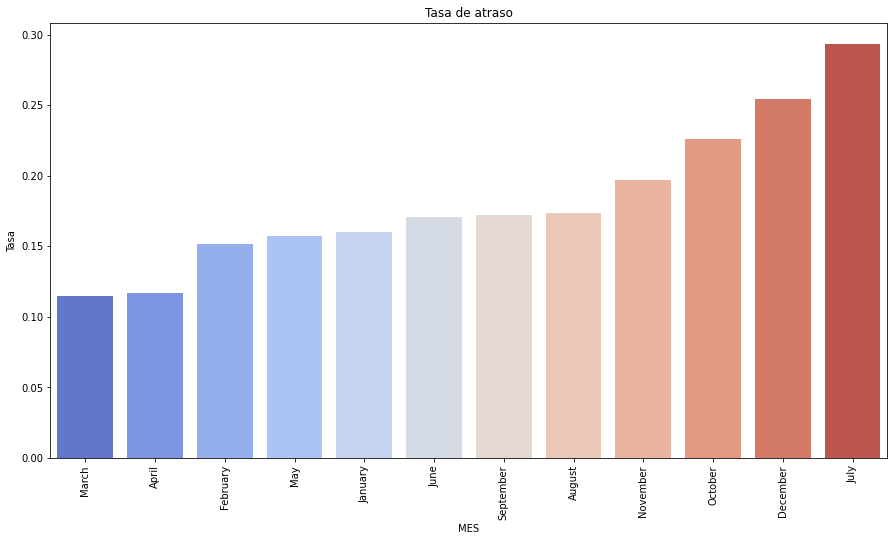

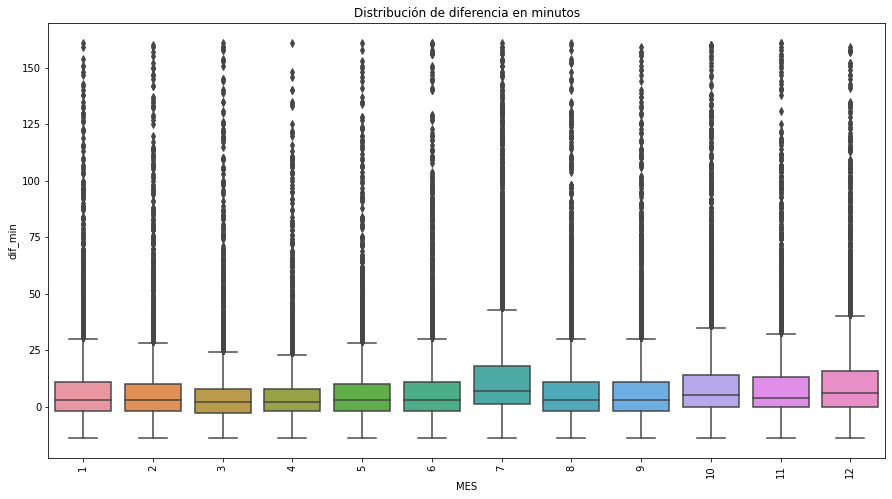

In [ ]:
mes_programado = programado.dt.strftime('%B')
destino = mes_programado.unique()

tasa_atraso=list()
for elem in destino:
  tasa = synthetic_features.atraso_15[mes_programado==elem].sum()/len(synthetic_features.atraso_15[mes_programado==elem])
  tasa_atraso.append(tasa)



tasa_destino = pd.concat([pd.DataFrame(destino),pd.DataFrame(tasa_atraso)],axis=1)
tasa_destino.columns = ['MES','Tasa']
tasa_destino = tasa_destino.sort_values('Tasa')


plt.figure(figsize=(15,8))
sns.barplot(tasa_destino.MES,tasa_destino.Tasa,palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Tasa de atraso')
plt.show()

atraso_dest = pd.concat([dataset_SCL['MES'],synthetic_features['dif_min']],axis=1)
plt.figure(figsize=(15,8))
sns.boxplot(x="MES",y="dif_min", data=atraso_dest)
plt.title('Distribución de diferencia en minutos')
plt.xticks(rotation=90)
plt.show()


### Tasa de atraso según día de la semana

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


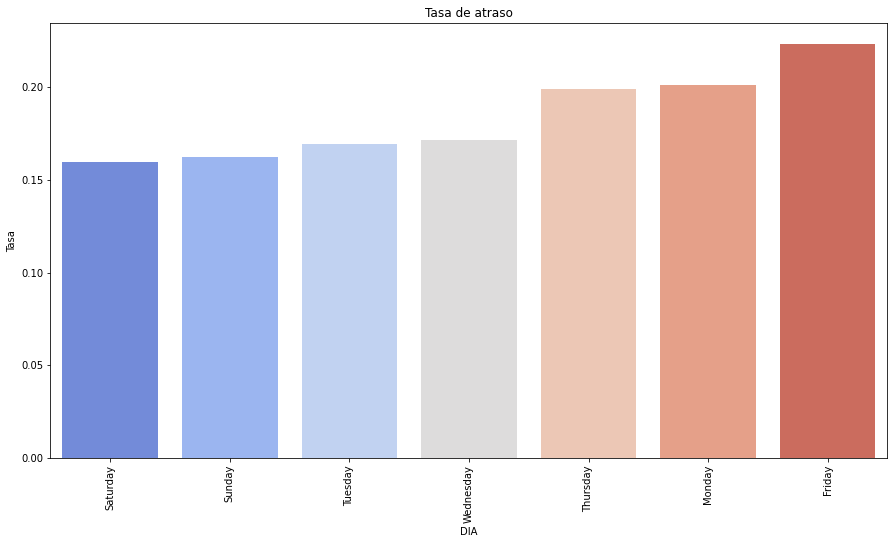

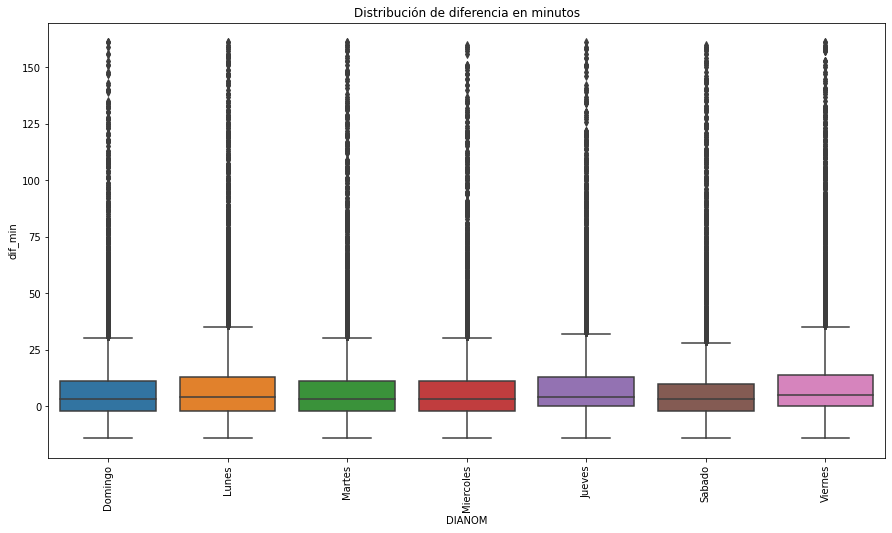

In [ ]:
mes_programado = programado.dt.strftime('%A')
destino = mes_programado.unique()

tasa_atraso=list()
for elem in destino:
  tasa = synthetic_features.atraso_15[mes_programado==elem].sum()/len(synthetic_features.atraso_15[mes_programado==elem])
  tasa_atraso.append(tasa)



tasa_destino = pd.concat([pd.DataFrame(destino),pd.DataFrame(tasa_atraso)],axis=1)
tasa_destino.columns = ['DIA','Tasa']
tasa_destino = tasa_destino.sort_values('Tasa')


plt.figure(figsize=(15,8))
sns.barplot(tasa_destino.DIA,tasa_destino.Tasa,palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Tasa de atraso')
plt.show()

atraso_dest = pd.concat([dataset_SCL['DIANOM'],synthetic_features['dif_min']],axis=1)
plt.figure(figsize=(15,8))
sns.boxplot(x="DIANOM",y="dif_min", data=atraso_dest)
plt.xticks(rotation=90)
plt.title('Distribución de diferencia en minutos')
plt.show()

### Tasa de retraso según periodo del día

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


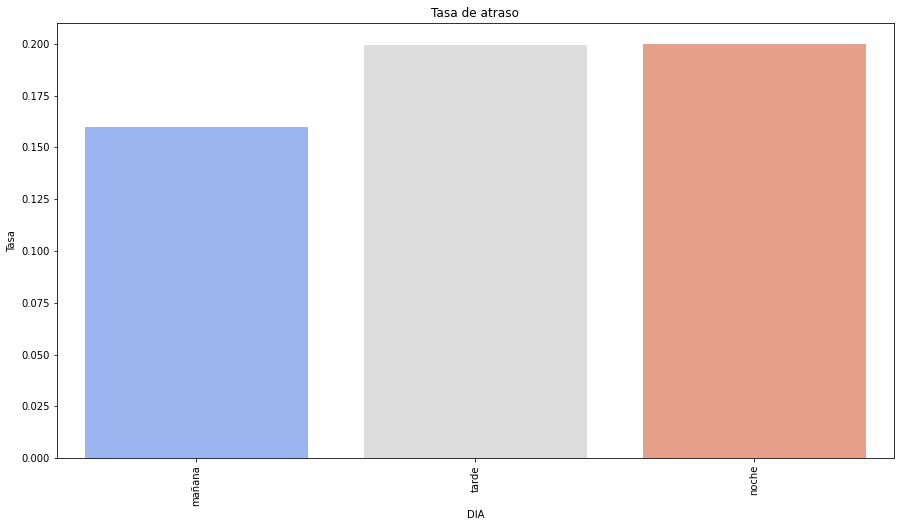

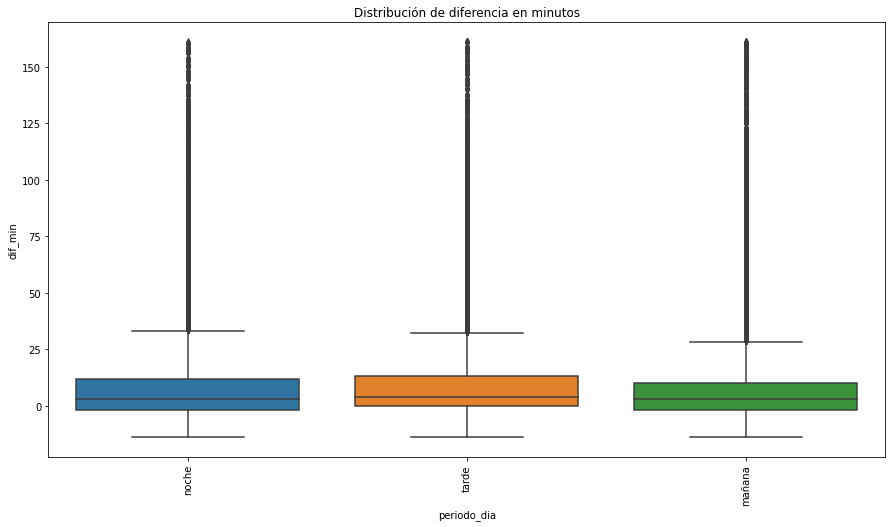

In [ ]:
destino = synthetic_features['periodo_dia'].unique()

tasa_atraso=list()
for elem in destino:
  tasa = synthetic_features.atraso_15[synthetic_features['periodo_dia']==elem].sum()/len(synthetic_features.atraso_15[synthetic_features['periodo_dia']==elem])
  tasa_atraso.append(tasa)



tasa_destino = pd.concat([pd.DataFrame(destino),pd.DataFrame(tasa_atraso)],axis=1)
tasa_destino.columns = ['DIA','Tasa']
tasa_destino = tasa_destino.sort_values('Tasa')


plt.figure(figsize=(15,8))
sns.barplot(tasa_destino.DIA,tasa_destino.Tasa,palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Tasa de atraso')
plt.show()


atraso_dest = pd.concat([synthetic_features['periodo_dia'],synthetic_features['dif_min']],axis=1)
plt.figure(figsize=(15,8))
sns.boxplot(x="periodo_dia",y="dif_min", data=atraso_dest)
plt.xticks(rotation=90)
plt.title('Distribución de diferencia en minutos')
plt.show()

### Tasa de retraso según tipo de vuelo

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


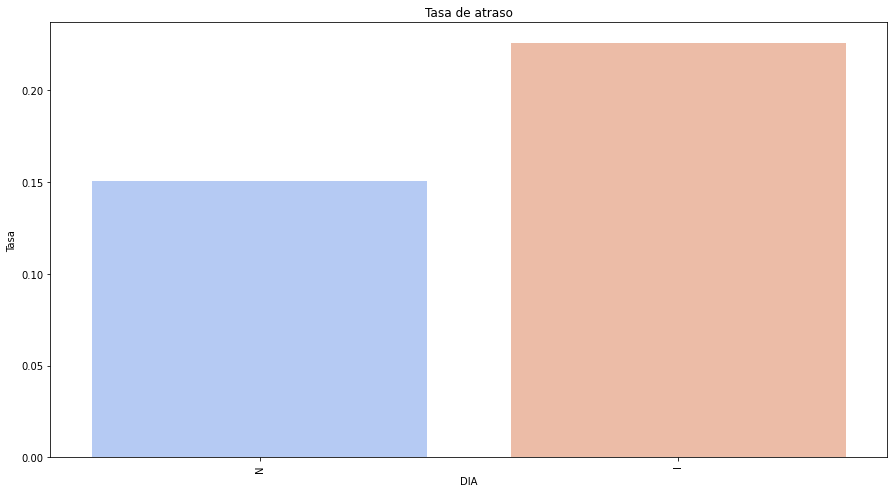

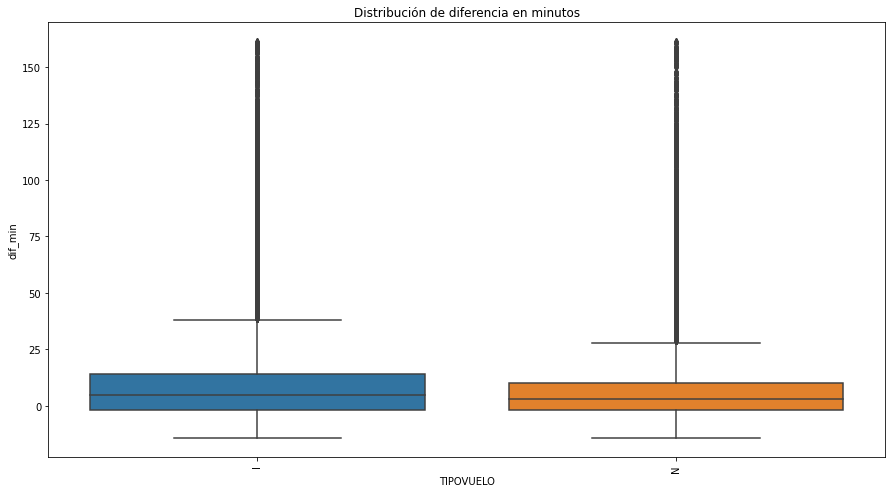

In [ ]:

destino = dataset_SCL['TIPOVUELO'].unique()

tasa_atraso=list()
for elem in destino:
  tasa = synthetic_features.atraso_15[dataset_SCL['TIPOVUELO']==elem].sum()/len(synthetic_features.atraso_15[dataset_SCL['TIPOVUELO']==elem])
  tasa_atraso.append(tasa)



tasa_destino = pd.concat([pd.DataFrame(destino),pd.DataFrame(tasa_atraso)],axis=1)
tasa_destino.columns = ['DIA','Tasa']
tasa_destino = tasa_destino.sort_values('Tasa')


plt.figure(figsize=(15,8))
sns.barplot(tasa_destino.DIA,tasa_destino.Tasa,palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Tasa de atraso')
plt.show()

atraso_dest = pd.concat([dataset_SCL['TIPOVUELO'],synthetic_features['dif_min']],axis=1)
plt.figure(figsize=(15,8))
sns.boxplot(x="TIPOVUELO",y="dif_min", data=atraso_dest)
plt.title('Distribución de diferencia en minutos')
plt.xticks(rotation=90)
plt.show()

### Tasa de atraso según temporada alta

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


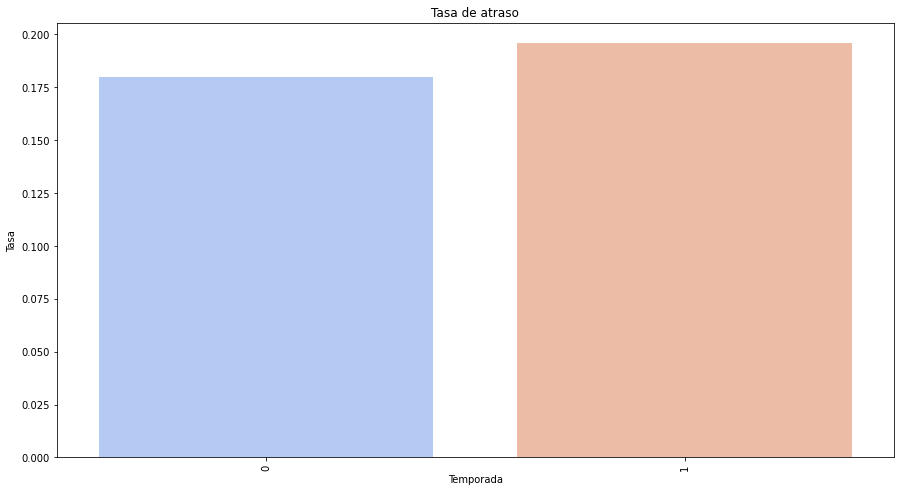

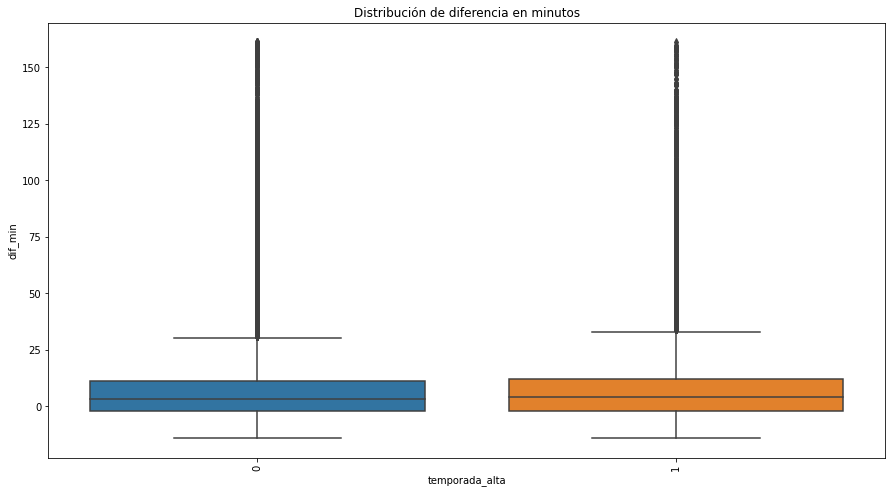

In [ ]:
destino = synthetic_features['temporada_alta'].unique()

tasa_atraso=list()
for elem in destino:
  tasa = synthetic_features.atraso_15[synthetic_features['temporada_alta']==elem].sum()/len(synthetic_features.atraso_15[synthetic_features['temporada_alta']==elem])
  tasa_atraso.append(tasa)



tasa_destino = pd.concat([pd.DataFrame(destino),pd.DataFrame(tasa_atraso)],axis=1)
tasa_destino.columns = ['Temporada','Tasa']
tasa_destino = tasa_destino.sort_values('Tasa')


plt.figure(figsize=(15,8))
sns.barplot(tasa_destino.Temporada,tasa_destino.Tasa,palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Tasa de atraso')
plt.show()

atraso_dest = pd.concat([synthetic_features['temporada_alta'],synthetic_features['dif_min']],axis=1)
plt.figure(figsize=(15,8))
sns.boxplot(x="temporada_alta",y="dif_min", data=atraso_dest)
plt.title('Distribución de diferencia en minutos')
plt.xticks(rotation=90)
plt.show()


 Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
 Qué variables esperarías que más influyeran en predecir atrasos?

Según la distribución de las tasas de atraso, el mes del año, la aerolínea y el destino tienen mayores tasas de atraso, por lo que podrían estar influyendo de mayor forma en predecir atrasos de vuelos

## Clasificador

In [ ]:
import sklearn.preprocessing
import sklearn.dummy
import sklearn.linear_model
import sklearn.tree
import sklearn.neural_network
import sklearn.svm
import sklearn.ensemble
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
synthetic_features

,Fecha-I,Fecha-O,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,2017-01-01 23:33:00,1,3.0,0,noche
1,2017-01-02 23:30:00,2017-01-02 23:39:00,1,9.0,0,noche
2,2017-01-03 23:30:00,2017-01-03 23:39:00,1,9.0,0,noche
3,2017-01-04 23:30:00,2017-01-04 23:33:00,1,3.0,0,noche
4,2017-01-05 23:30:00,2017-01-05 23:28:00,1,-3.0,0,noche
...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,2017-12-22 15:41:00,1,46.0,1,tarde
68202,2017-12-25 14:55:00,2017-12-25 15:11:00,1,16.0,1,tarde
68203,2017-12-27 14:55:00,2017-12-27 15:35:00,1,40.0,1,tarde
68204,2017-12-29 14:55:00,2017-12-29 15:08:00,1,13.0,0,tarde


Realizamos un One-Hot encoder para las variables catogóricas, para este caso el periodo del dia es el parametro modificado.

In [ ]:
enc = sklearn.preprocessing.OneHotEncoder() # Instanciamos nuestro One-Hot Encoder
features_transformed = pd.DataFrame(
    enc.fit_transform(synthetic_features.periodo_dia.values.reshape(-1, 1)).todense(), # Entrenamos nuestro transformador y transformamos las características
    columns = enc.get_feature_names()
)
features_transformed


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_mañana,x0_noche,x0_tarde
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
68201,0.0,0.0,1.0
68202,0.0,0.0,1.0
68203,0.0,0.0,1.0
68204,0.0,0.0,1.0


In [ ]:
features = pd.concat([synthetic_features['temporada_alta'],features_transformed],axis=1)
label = synthetic_features['atraso_15']

In [ ]:
features = pd.concat([features,dataset_SCL[['DIA','MES']]],axis=1)

In [ ]:
features

,temporada_alta,x0_mañana,x0_noche,x0_tarde,DIA,MES
0,1,0.0,1.0,0.0,1,1
1,1,0.0,1.0,0.0,2,1
2,1,0.0,1.0,0.0,3,1
3,1,0.0,1.0,0.0,4,1
4,1,0.0,1.0,0.0,5,1
...,...,...,...,...,...,...
68201,1,0.0,0.0,1.0,22,12
68202,1,0.0,0.0,1.0,25,12
68203,1,0.0,0.0,1.0,27,12
68204,1,0.0,0.0,1.0,29,12


Realizamos un One-Hot encoder para las variables catogóricas Dia de semana (DIANOM) y el Destino (SIGLADES)

In [ ]:
enc = sklearn.preprocessing.OneHotEncoder() # Instanciamos nuestro One-Hot Encoder
features_transformed_2 = pd.DataFrame(
    enc.fit_transform(dataset_SCL[['DIANOM','SIGLADES']]).todense(), # Entrenamos nuestro transformador y transformamos las características
    columns = enc.get_feature_names()
)
features_transformed_2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_Domingo,x0_Jueves,x0_Lunes,x0_Martes,x0_Miercoles,x0_Sabado,x0_Viernes,x1_Antofagasta,x1_Arica,x1_Asuncion,...,"x1_San Juan, Arg.",x1_Santa Cruz,x1_Sao Paulo,x1_Sydney,x1_Temuco,x1_Toronto,x1_Tucuman,x1_Ushuia,x1_Valdivia,x1_Washington
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68202,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68203,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68204,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
features = pd.concat([features,features_transformed_2],axis=1)
features

,temporada_alta,x0_mañana,x0_noche,x0_tarde,DIA,MES,x0_Domingo,x0_Jueves,x0_Lunes,x0_Martes,...,"x1_San Juan, Arg.",x1_Santa Cruz,x1_Sao Paulo,x1_Sydney,x1_Temuco,x1_Toronto,x1_Tucuman,x1_Ushuia,x1_Valdivia,x1_Washington
0,1,0.0,1.0,0.0,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,2,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,1.0,0.0,3,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,1.0,0.0,4,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,1.0,0.0,5,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,1,0.0,0.0,1.0,22,12,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68202,1,0.0,0.0,1.0,25,12,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68203,1,0.0,0.0,1.0,27,12,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68204,1,0.0,0.0,1.0,29,12,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Generamos un set de datos para entrenar y set de datos para evaluar

In [ ]:
features_train, features_test, label_train, label_test = sklearn.model_selection.train_test_split( # Vamos a guardar todos los subconjuntos que nos devolverá la función en distintas variables
    features, 
    label, 
    test_size=0.20, # Este es el tamaño relativo que tendrá el subconjunto de prueba
    random_state=11, # # Con esto bloqueamos el generador de números aleatorios para tener resultados consistentes
    stratify=label # Conservamos las proporciones entre las clases
)

Evaluaremos los siguientes modelos de clasificación

* Dummy Classifier, como línea base.
* Árbol de decisión.
* k-nearest neighbors.
* Support Vector Machine.
* Random Forest.


In [ ]:
dummy_classifier = sklearn.dummy.DummyClassifier(strategy="stratified", random_state=12)
dummy_classifier.fit(features_train, label_train)
print(sklearn.metrics.classification_report(label_test,dummy_classifier.predict(features_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11119
           1       0.19      0.19      0.19      2523

    accuracy                           0.70     13642
   macro avg       0.50      0.50      0.50     13642
weighted avg       0.70      0.70      0.70     13642



In [ ]:
tree_decision = sklearn.tree.DecisionTreeClassifier()
tree_decision.fit(features_train, label_train)
print(sklearn.metrics.classification_report(label_test,tree_decision.predict(features_test)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     11119
           1       0.34      0.20      0.25      2523

    accuracy                           0.78     13642
   macro avg       0.59      0.55      0.56     13642
weighted avg       0.74      0.78      0.76     13642



In [ ]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(features_train, label_train)
print(sklearn.metrics.classification_report(label_test,knn.predict(features_test)))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     11119
           1       0.32      0.13      0.18      2523

    accuracy                           0.79     13642
   macro avg       0.57      0.53      0.53     13642
weighted avg       0.73      0.79      0.75     13642



In [ ]:
svm_linear = sklearn.svm.SVC(kernel="linear")
svm_linear.fit(features_train, label_train)
print(sklearn.metrics.classification_report(label_test,svm_linear.predict(features_test)))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     11119
           1       0.76      0.01      0.02      2523

    accuracy                           0.82     13642
   macro avg       0.79      0.50      0.46     13642
weighted avg       0.81      0.82      0.74     13642



In [ ]:
random_forest = sklearn.ensemble.RandomForestClassifier() # Instanciamos Random Forest.
random_forest.fit( # Ajustamos nuestro modelo.
    features_train,
    label_train
)
print(sklearn.metrics.classification_report(
    label_test,
    random_forest.predict(features_test)
))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     11119
           1       0.35      0.20      0.25      2523

    accuracy                           0.78     13642
   macro avg       0.59      0.56      0.56     13642
weighted avg       0.74      0.78      0.76     13642



Para evaluar que clasificador es mejor utilizaremos el macro average, ya que este nos entrega información que no se ve afectada por el desbalance de clases.

Para este caso el mejor clasificador es el modelo Random Forest. A continuación vemos la probabilidad de atraso de los datos de test, siendo 1 atraso.

In [ ]:
test_prob_rf= random_forest.predict_proba(features_test)
pd.DataFrame(test_prob_rf)

,0,1
0,0.267333,0.732667
1,0.806937,0.193063
2,0.998000,0.002000
3,0.989667,0.010333
4,0.995714,0.004286
...,...,...
13637,0.972667,0.027333
13638,1.000000,0.000000
13639,0.348889,0.651111
13640,0.489333,0.510667


Otra forma de evaluar el desempeño de los modelos evaluados es mediante la curva ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

<Figure size 720x720 with 0 Axes>

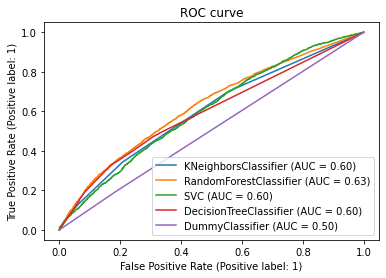

In [ ]:
plt.figure(figsize=(10,10))
svc_roc_curve = sklearn.metrics.plot_roc_curve(
    knn,
    features_test,
    label_test,
)
sklearn.metrics.plot_roc_curve(
    random_forest,
    features_test,
    label_test,
    ax=svc_roc_curve.ax_
)
sklearn.metrics.plot_roc_curve(
    svm_linear,
    features_test,
    label_test,
    ax=svc_roc_curve.ax_
)
sklearn.metrics.plot_roc_curve(
    tree_decision,
    features_test,
    label_test,
    ax=svc_roc_curve.ax_
)

sklearn.metrics.plot_roc_curve(
    dummy_classifier,
    features_test,
    label_test,
    ax=svc_roc_curve.ax_
)
plt.title('ROC curve')
plt.show()

Para este caso Random Forest nos vuelve a dar el mejor resultado.

Qué variables son las que más influyen en la predicción?  Cómo podrías mejorar la performance?

A continuación extraemos desde nuesto modelo entrenado es la lista de importancia de características, con la cual podemos conocer qué características son más importantes para el modelo.



In [ ]:
feature_importance_list = pd.DataFrame(
    zip(features.columns, 
        random_forest.feature_importances_), # En este atributo está almacenada la lista de importancia de características.
    columns=["feature","importance"])
feature_importance_list.sort_values("importance",ascending=False)

,feature,importance
4,DIA,0.383624
5,MES,0.191729
0,temporada_alta,0.023448
3,x0_tarde,0.015480
2,x0_noche,0.014349
...,...,...
25,x1_Cataratas Iguacu,0.000015
32,"x1_Curitiba, Bra.",0.000009
19,x1_Bariloche,0.000009
74,x1_Washington,0.000004


Los siguientes puntos nos podrían mejorar la perfomance de nuestro modelo:

* Balancear las clases: ya que presentamos una diferencia en la distribución de clases. Ya observamos que el 18% de los datos corresponden a la clase atraso. Esto lo podemoshacer reduciendo la clase mayor o creando data artificial de la clase menos representada.

* Ocupar las variables más importante o eliminando las que menos influyen. Esto lo obtenemos desde la extracción de caracteristicas importantes que realizamos anteriormente.

* Optimizar el modelo mediante la búsqueda de parametros que mejor se ajuste para la mejora del perfomance